In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import random
import os
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,13): # ignore 'ID'
        rmse = mean_squared_error(np.array(gt)[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(np.array(gt)[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:15])
    return score

NRMSE : 1.9742878984701697


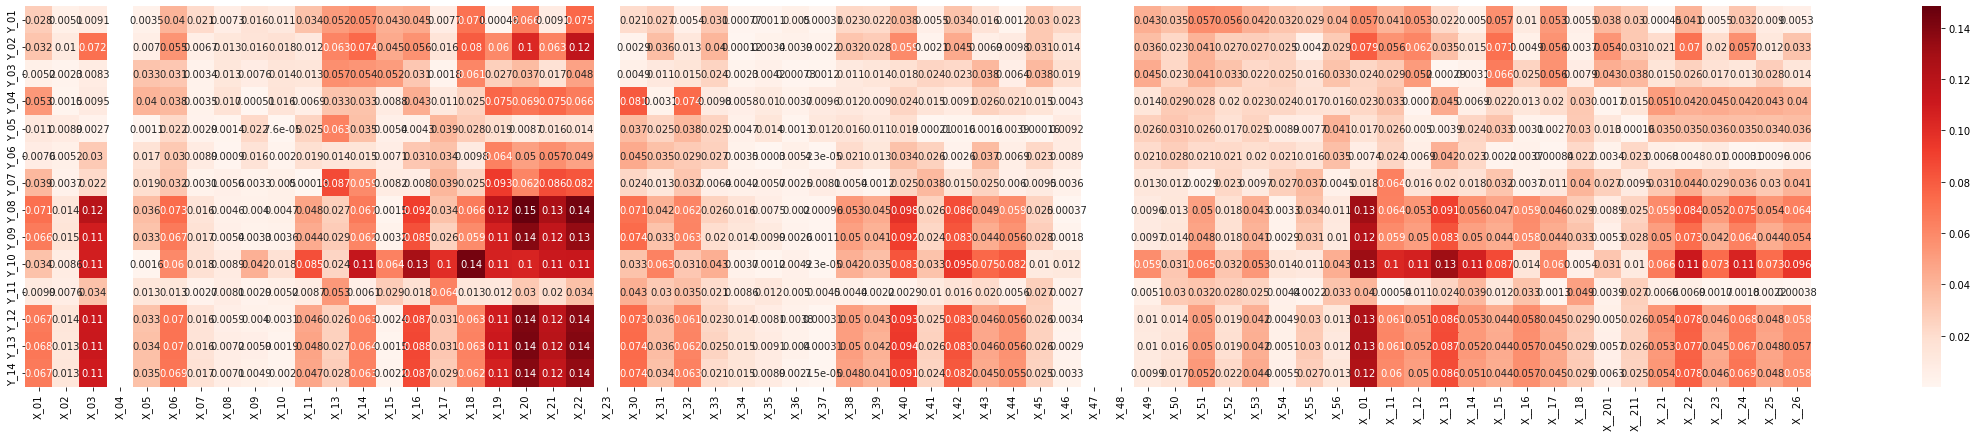

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LG/train.csv').drop(columns="ID")

#################################################################################################################
train_df['X__01'] = train_df['X_03'] / train_df['X_07']
train_df['X_10'] = train_df['X__01'] * train_df['X_08']
train_df['X_11'] = train_df['X__01'] * train_df['X_09']

train_df['X__11'] = (train_df['X_41'] * train_df['X_14']) 
train_df['X__12'] = (train_df['X_42'] * train_df['X_15']) 
train_df['X__13'] = (train_df['X_43'] * train_df['X_16']) 
train_df['X__14'] = (train_df['X_44'] * train_df['X_17']) 
train_df['X__15'] = (train_df['X_41'] / train_df['X_14']) 
train_df['X__16'] = (train_df['X_42'] / train_df['X_15']) 
train_df['X__17'] = (train_df['X_43'] / train_df['X_16']) 
train_df['X__18'] = (train_df['X_44'] / train_df['X_17'])

train_df['X__201'] = train_df.loc[:,['X_19','X_20','X_21','X_22']].max(axis=1) - train_df.loc[:,['X_19','X_20','X_21','X_22']].min(axis=1)
train_df['X__211'] = train_df.loc[:,['X_41','X_42','X_43','X_44']].max(axis=1) - train_df.loc[:,['X_41','X_42','X_43','X_44']].min(axis=1)

# 커넥터 핀 휨 
train_df['X__21'] = (train_df['X_24'] - train_df['X_12'])
train_df['X__22'] = (train_df['X_25'] - train_df['X_12'])
train_df['X__23'] = (train_df['X_26'] - train_df['X_12'])
train_df['X__24'] = (train_df['X_27'] - train_df['X_12'])
train_df['X__25'] = (train_df['X_28'] - train_df['X_12'])
train_df['X__26'] = (train_df['X_29'] - train_df['X_12'])

# 커넥터 위치 좌표, 각 커넥터 수치 drop
train_df.drop(labels = ['X_12','X_24','X_25','X_26','X_27','X_28','X_29'], axis=1, inplace=True)

# 스크류 체결 시 분당 회전수 drop
train_df.drop(labels = ['X_34','X_35','X_36','X_37'], axis=1, inplace=True)
#################################################################################################################

cor_pass = train_df.corr(method='pearson')
cor_pass = xycor_pass = cor_pass.filter(regex='X').filter(regex='Y', axis=0)

plt.rcParams["figure.figsize"] = (40,7)
sns.heatmap(xycor_pass.abs(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
          )

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=10)

model = MultiOutputRegressor(LinearRegression())
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

lg_score = lg_nrmse(y_test, y_predict)
print('NRMSE :', lg_score)

In [ ]:
from xgboost import XGBRegressor

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=10)

model = MultiOutputRegressor(XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=1, subsample=0.75,
                           colsample_bytree=1, max_depth=7))
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

lg_score = lg_nrmse(y_test, y_predict)
print('NRMSE :', lg_score)

[14:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
test_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LG/test.csv').drop(columns=['ID'])

############################################################################################################################
test_x['X__01'] = test_x['X_03'] / test_x['X_07']
test_x['X_10'] = test_x['X__01'] * test_x['X_08']
test_x['X_11'] = test_x['X__01'] * test_x['X_09']

test_x['X__11'] = (test_x['X_41'] * test_x['X_14']) 
test_x['X__12'] = (test_x['X_42'] * test_x['X_15']) 
test_x['X__13'] = (test_x['X_43'] * test_x['X_16']) 
test_x['X__14'] = (test_x['X_44'] * test_x['X_17'])
test_x['X__15'] = (test_x['X_41'] / test_x['X_14']) 
test_x['X__16'] = (test_x['X_42'] / test_x['X_15'])
test_x['X__17'] = (test_x['X_43'] / test_x['X_16']) 
test_x['X__18'] = (test_x['X_44'] / test_x['X_17'])

test_x['X__201'] = test_x.loc[:,['X_19','X_20','X_21','X_22']].max(axis=1) - test_x.loc[:,['X_19','X_20','X_21','X_22']].min(axis=1)
test_x['X__211'] = test_x.loc[:,['X_41','X_42','X_43','X_44']].max(axis=1) - test_x.loc[:,['X_41','X_42','X_43','X_44']].min(axis=1)

# 커넥터 핀 휨 
test_x['X__21'] = (test_x['X_24'] - test_x['X_12'])
test_x['X__22'] = (test_x['X_25'] - test_x['X_12'])
test_x['X__23'] = (test_x['X_26'] - test_x['X_12'])
test_x['X__24'] = (test_x['X_27'] - test_x['X_12'])
test_x['X__25'] = (test_x['X_28'] - test_x['X_12'])
test_x['X__26'] = (test_x['X_29'] - test_x['X_12'])

# 커넥터 위치 좌표, 각 커넥터 수치 drop
test_x.drop(labels = ['X_12','X_24','X_25','X_26','X_27','X_28','X_29'], axis=1, inplace=True)

# 스크류 체결 시 분당 회전수 drop
test_x.drop(labels = ['X_34','X_35','X_36','X_37'], axis=1, inplace=True)
##########################################################################################################################

LR = MultiOutputRegressor(XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=1, subsample=0.75,
                           colsample_bytree=1, max_depth=7)).fit(train_x, train_y)

preds = LR.predict(test_x)

submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LG/sample_submission.csv')

for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

submit.to_csv('/content/drive/MyDrive/Colab Notebooks/LG/submit.csv', index=False)

[15:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re